In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np

In [2]:
# import data from text file
import pandas as pds

ge_data = pds.read_csv("SuperCDMS/PhysRevD.99.062001-data/MarchAprilData.txt", skiprows=1, \
                         names=['time', 'blah'], \
                         delim_whitespace=True)

ge_data = ge_data.sort_values(by='time')

print (ge_data.head(10))

t = np.asarray(ge_data["time"])




      time    blah
0  18.2372  5.7520
1  18.8376  4.8699
2  21.7213  4.5819
3  31.5173  3.8949
4  36.6141  6.6432
5  36.6904  3.9877
6  45.3014  4.5169
7  48.1338  6.0118
8  48.7492  4.6097
9  50.4288  6.1974


In [3]:
#make histos


tbins = np.linspace(0,720,100)
xcq = (tbins[:-1] + tbins[1:]) / 2
n,nx = np.histogram(t,bins=tbins)

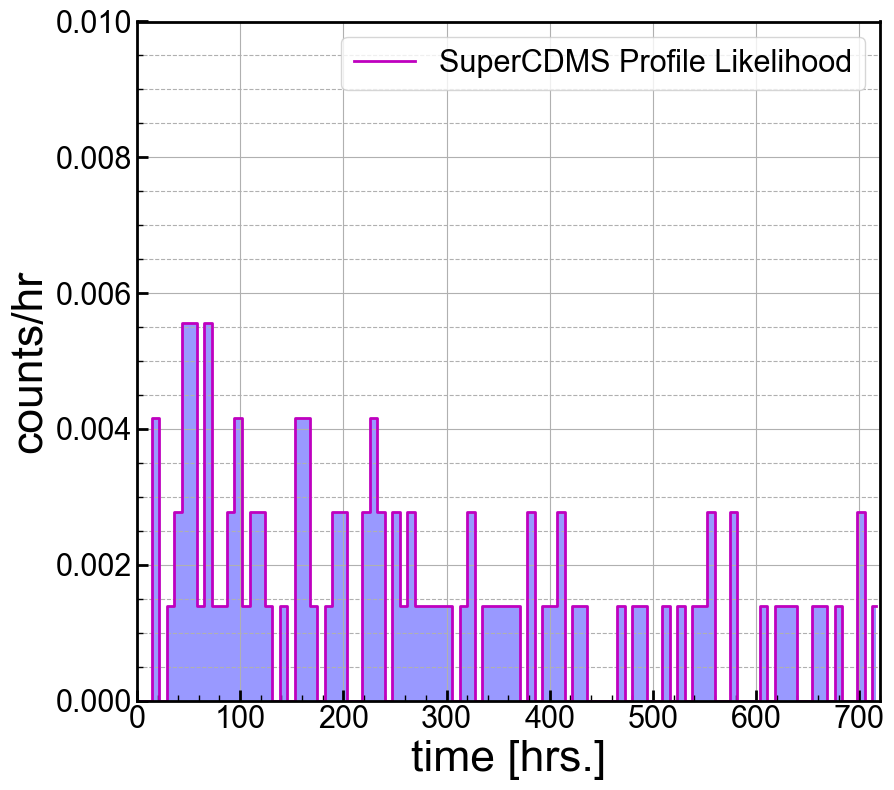

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq)[0]


#print(estring)
ax1.step(xcq,thist, where='mid',color='m', linestyle='-', \
            label='SuperCDMS Profile Likelihood', linewidth=2)


ymin = 0.0
ymax = 0.01

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 720) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'time [hrs.]')
ax1.set_ylabel('counts/hr')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()